In [79]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data1 = pd.read_excel(r"D:\桌面\music_top1.xlsx")
data2 = pd.read_excel(r"D:\桌面\music_top2.xlsx")
data3 = pd.read_excel(r"D:\桌面\music_top3.xlsx")
data4 = pd.read_excel(r"D:\桌面\music_top4.xlsx")

In [61]:
data= pd.concat([data1,data2,data3,data4], ignore_index=True)

In [81]:
# 划分特征和目标
feature=data.iloc[:,1:-1]
target=data.iloc[:,-1]


In [82]:
# xgb所需要的编码
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
target = label_encoder.fit_transform(target)


In [83]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(feature,target,test_size=0.2,random_state=42)

In [84]:
# 标准化
# 实际上xgboost是不需要标准化的
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

x_train = pd.DataFrame(X_train_scaled,columns=x_train.columns)
x_test= pd.DataFrame(X_test_scaled,columns=x_test.columns)

In [86]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

acc=[]

clf_model = xgb.XGBClassifier(objective='multi:softmax', n_jobs=--4,num_class=10, max_depth=3,min_child_weight=1, learning_rate=0.11, 
                              gamma=0,subsample=0.94,colsample_bytree=0.86,n_estimators=480)

# 训练模型
clf_model.fit(x_train, y_train)

# 进行预测
y_pred = clf_model.predict(x_test)

# 在测试集上进行预测
y_pred_test = clf_model.predict(x_test)
y_pred_train = clf_model.predict(x_train)

# 评估模型性能
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)

print("accuracy_train:"+str(accuracy_train))
print("accuracy_test:"+str(accuracy_test))


accuracy_train:0.9862204724409449
accuracy_test:0.675392670157068


In [54]:
# 模型保存
import joblib

joblib.dump(clf_model,'model.dat')


['model.dat']

In [28]:
# Top-2 acc
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# 获取测试集样本的概率预测
proba_predictions = clf_model.predict_proba(x_test)

# 获取前两个可能性最大的类别
top_two_predictions = [sorted(zip(clf_model.classes_, probas), key=lambda x: x[1], reverse=True)[:2] for probas in proba_predictions]

count=0
for i in range(len(top_two_predictions)):
    if top_two_predictions[i][0][0]==y_test[i] or top_two_predictions[i][1][0]==y_test[i]:
        
        count+=1
print(count/len(y_test))


0.8403141361256544


In [161]:
import shap

explainer = shap.TreeExplainer(clf_model)
shap_values = explainer.shap_values(x_train)

[19:13:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


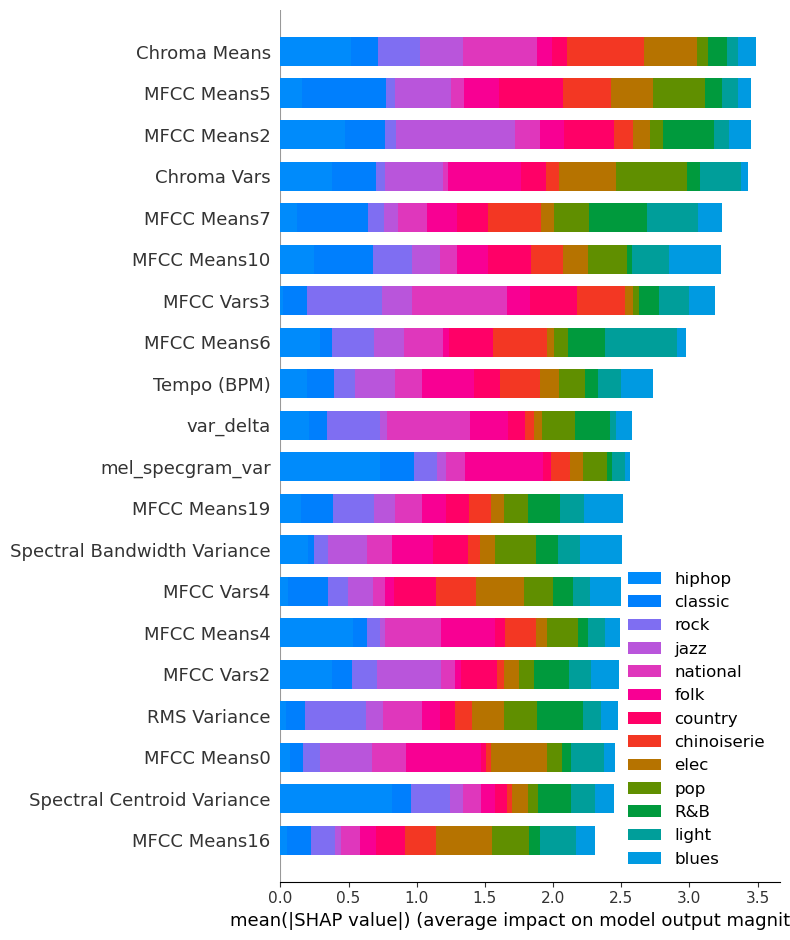

In [193]:
shap.summary_plot(shap_values, feature_names=x_train.columns,
                  class_names=['pop','hiphop','chinoiserie','rock','elec','folk','R&B','national','light','jazz','classic','country','blues'],
                 plot_type="bar")


### shape(shap_values)

In [72]:
# 随机搜索来进行参数优化
# 受限于电脑性能，实际在服务器上运行
import numpy as np
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from random import randint
from sklearn.model_selection import RandomizedSearchCV

acc=[]

param_dist={
    'max_depth': np.arange(3,16),
    'min_child_weight' :np.arange(1,5),
    'learning_rate' :np.arange(0.05,0.2,0.01),
    'gamma' :np.arange(0,0.5,0.1),
    'subsample' :np.arange(0.7,0.95,0.02),
    'colsample_bytree' :np.arange(0.7,0.95,0.02),
    'n_estimators' : np.arange(200,500,20)
}


clf_model = xgb.XGBClassifier(objective='multi:softmax', n_jobs=--4,num_class=10)

random_search = RandomizedSearchCV(clf_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)

random_search.fit(feature, target)

# 查看最佳参数组合和对应的评分
print("Best Parameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)


KeyboardInterrupt



In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

# 随机森林
# 创建随机森林分类器


clf_model = RandomForestClassifier(n_estimators=600,max_depth=30)

# 训练分类器
clf_model.fit(x_train, y_train)

# 在测试集上进行预测
y_pred_test = clf_model.predict(x_test)
y_pred_train = clf_model.predict(x_train)

# 评估模型性能
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)

# report = classification_report(y_test, y_pred)

print("accuracy_train:"+str(accuracy_train))
print("accuracy_test:"+str(accuracy_test))


accuracy_train:0.985277960887717
accuracy_test:0.5685413005272407


In [29]:
from sklearn.metrics import r2_score,mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


In [30]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectFromModel, SelectKBest, RFE

In [35]:
# 使用过滤法进行特征选择

X_selected = SelectKBest(k=15).fit_transform(feature, target)

x_train, x_test, y_train, y_test = train_test_split(X_selected, target,test_size=0.2, random_state=3)

# 获取选择的特征索引
selected_feature_indexes = sfm.get_support(indices=True)

# 将索引映射回特征名
selected_features = [feature.columns[i] for i in selected_feature_indexes]

selected_features

['Chroma Means',
 'Chroma Vars',
 'RMS Mean',
 'RMS Variance',
 'Spectral Centroid Mean',
 'Spectral Centroid Variance',
 'Spectral Bandwidth Variance',
 'Roll-off Mean',
 'Roll-off Variance',
 'Zero Crossing Rate Mean',
 'Zero Crossing Rate Variance',
 'mel_specgram_var',
 'var_delta',
 'MFCC Means2',
 'MFCC Vars8']

In [36]:
# 使用包裹法进行特征选择
sfm = RFE(clf_model,n_features_to_select=15)
X_selected = sfm.fit_transform(feature, target)

x_train, x_test, y_train, y_test = train_test_split(X_selected,target,test_size=0.2, random_state=3)

# 获取选择的特征索引
selected_feature_indexes = sfm.get_support(indices=True)

# 将索引映射回特征名
selected_features = [feature.columns[i] for i in selected_feature_indexes]

selected_features

['Chroma Means',
 'Chroma Vars',
 'RMS Mean',
 'RMS Variance',
 'Spectral Centroid Mean',
 'Spectral Centroid Variance',
 'Spectral Bandwidth Variance',
 'Roll-off Mean',
 'mel_specgram_var',
 'var_delta',
 'MFCC Means2',
 'MFCC Vars2',
 'MFCC Vars3',
 'MFCC Means4',
 'MFCC Vars16']

In [34]:
# 使用嵌入法进行特征选择
sfm = SelectFromModel(clf_model,threshold=-1, max_features=15)
X_selected = sfm.fit_transform(feature, target)

x_train, x_test, y_train, y_test = train_test_split(X_selected, target,test_size=0.2, random_state=3)

# 获取选择的特征索引
selected_feature_indexes = sfm.get_support(indices=True)

# 将索引映射回特征名
selected_features = [feature.columns[i] for i in selected_feature_indexes]

selected_features

['Chroma Means',
 'Chroma Vars',
 'RMS Mean',
 'RMS Variance',
 'Spectral Centroid Mean',
 'Spectral Centroid Variance',
 'Spectral Bandwidth Variance',
 'Roll-off Mean',
 'Roll-off Variance',
 'Zero Crossing Rate Mean',
 'Zero Crossing Rate Variance',
 'mel_specgram_var',
 'var_delta',
 'MFCC Means2',
 'MFCC Vars8']

In [40]:
# 采用软投票的集成学习方法
from sklearn.datasets import load_iris
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# 创建三个不同类型的基本分类器
clf1 = RandomForestClassifier(n_estimators=600, random_state=42)
clf2 = GradientBoostingClassifier(random_state=142)
clf3 = xgb.XGBClassifier(objective='multi:softmax', n_jobs=--4,num_class=10, max_depth=3,min_child_weight=1, learning_rate=0.11, 
                              gamma=0,subsample=0.94,colsample_bytree=0.86,n_estimators=480)


# 定义VotingClassifier，使用soft参数启用软投票
voting_clf = VotingClassifier(estimators=[('rf', clf1), ('gb', clf2), ('xgb', clf3)], voting='soft')

# 训练 VotingClassifier
voting_clf.fit(x_train, y_train)

# 预测结果
y_pred = voting_clf.predict(x_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy (Soft Voting):", accuracy)

Accuracy (Soft Voting): 0.5261780104712042


In [75]:
# 混淆矩阵

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_test)
cm

array([[63,  1,  5,  0,  7,  9,  6, 11,  1,  1,  1,  8,  6],
       [ 0, 85,  0,  1,  2,  0,  2,  1,  7,  6,  7,  0,  3],
       [ 6,  0, 71,  1,  4,  5, 12,  0,  1,  4,  3, 15,  2],
       [ 0,  1,  0, 69,  0,  2,  1,  0, 10,  9,  3,  0,  3],
       [ 4,  5,  5,  1, 62,  5,  2,  8,  7,  0,  0,  3,  6],
       [15,  1,  8,  1,  6, 73,  1, 11,  1,  2,  1,  1,  4],
       [ 1,  4,  7,  1,  3,  2, 61,  2,  3,  3,  1, 12, 18],
       [16,  0,  3,  1,  7,  4,  0, 61,  2,  0,  1,  3, 13],
       [ 2,  5,  1, 12,  2,  0,  9,  4, 63, 12,  2,  2, 11],
       [ 5,  1,  1, 12,  0,  0,  6,  0,  3, 82,  0,  4,  2],
       [ 2,  6,  4,  4,  4,  0, 10,  2,  8,  9, 67,  4,  5],
       [ 8,  1, 14,  0,  9,  4, 12,  6,  3,  1,  1, 61,  8],
       [ 2,  5,  6,  0,  5,  9,  9,  8,  0,  0,  6,  5, 62]], dtype=int64)

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression


In [77]:
label_list1=['pop','hiphop','chinoiserie','rock','elec','folk','R&B','national','light','jazz','classic','country','blues']
label_list2 = ['0','1','2','3','4','5','6','7','8','9','10','11','12']

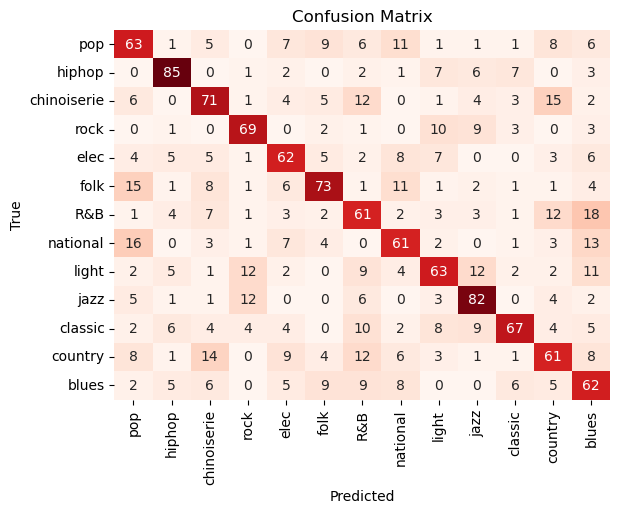

In [78]:

y_pred=y_pred_test
C = confusion_matrix(y_test, y_pred, labels=label_list2) # 可将'1'等替换成自己的类别，如'cat'。
# 计算混淆矩阵
cm = confusion_matrix(y_test, y_pred)

# 使用 seaborn 绘制混淆矩阵热图
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", cbar=False,
            xticklabels=label_list1,
            yticklabels=label_list1)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [59]:
y_pred=y_pred_test
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print('precision:'+str(precision))
print('recall:'+str(recall))
print('f1:'+str(f1))

precision:0.6946145138221644
recall:0.675392670157068
f1:0.6765218040184585
